In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Flight_Booking.csv')
df= df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [4]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

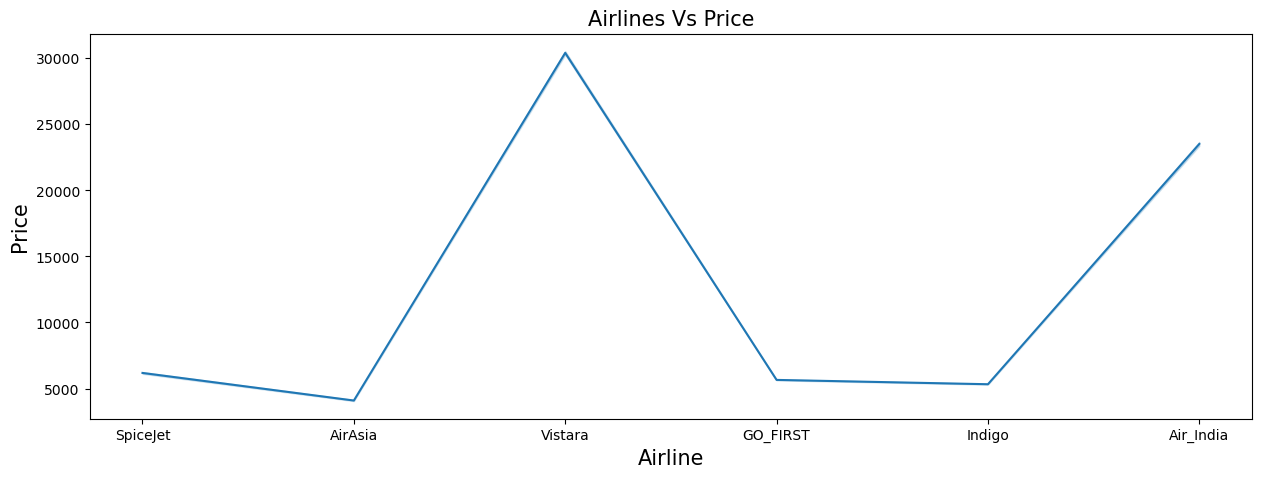

In [5]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

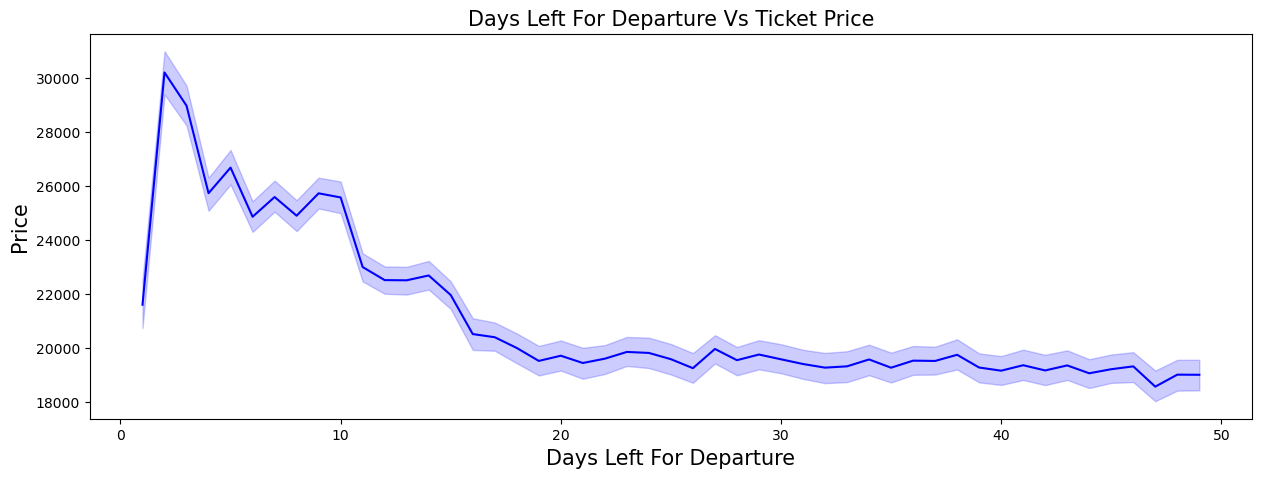

In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'],y=df['price'],color='blue')
plt.title('Days Left For Departure Vs Ticket Price', fontsize=15)
plt.xlabel('Days Left For Departure', fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

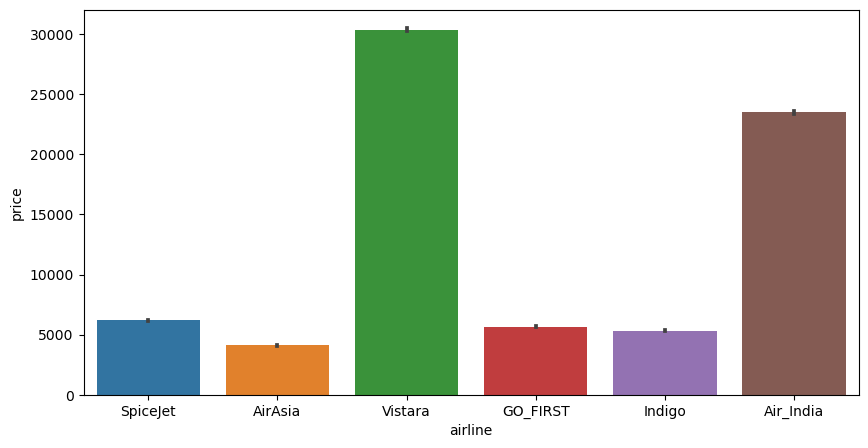

In [7]:
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df)


<Axes: xlabel='class', ylabel='price'>

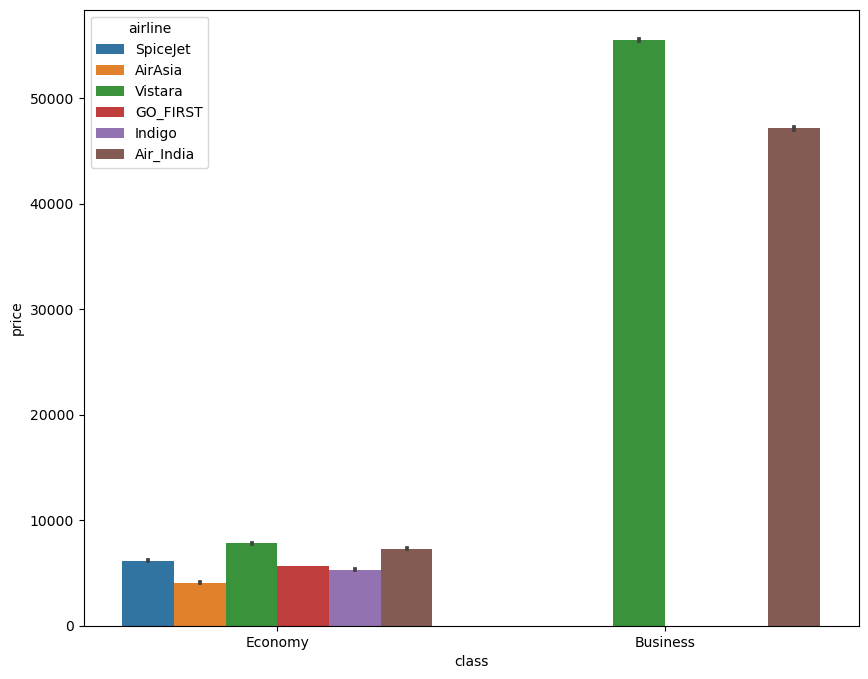

In [8]:
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue = 'airline')

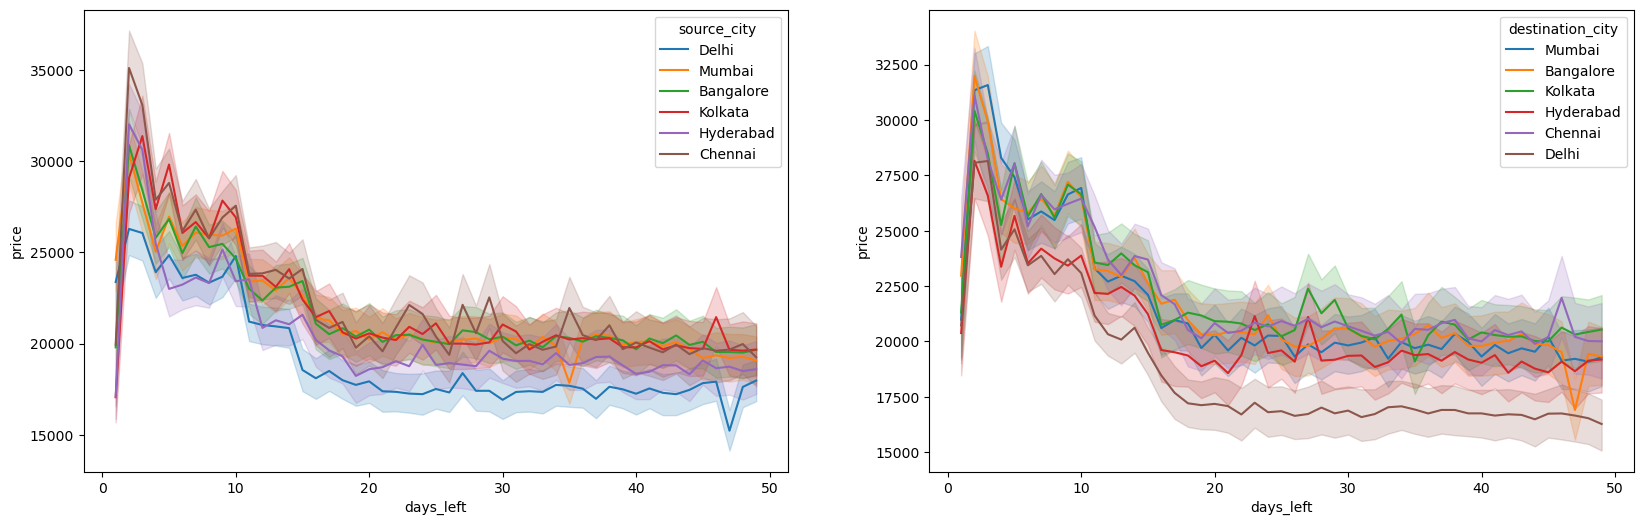

In [9]:
fig,ax= plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

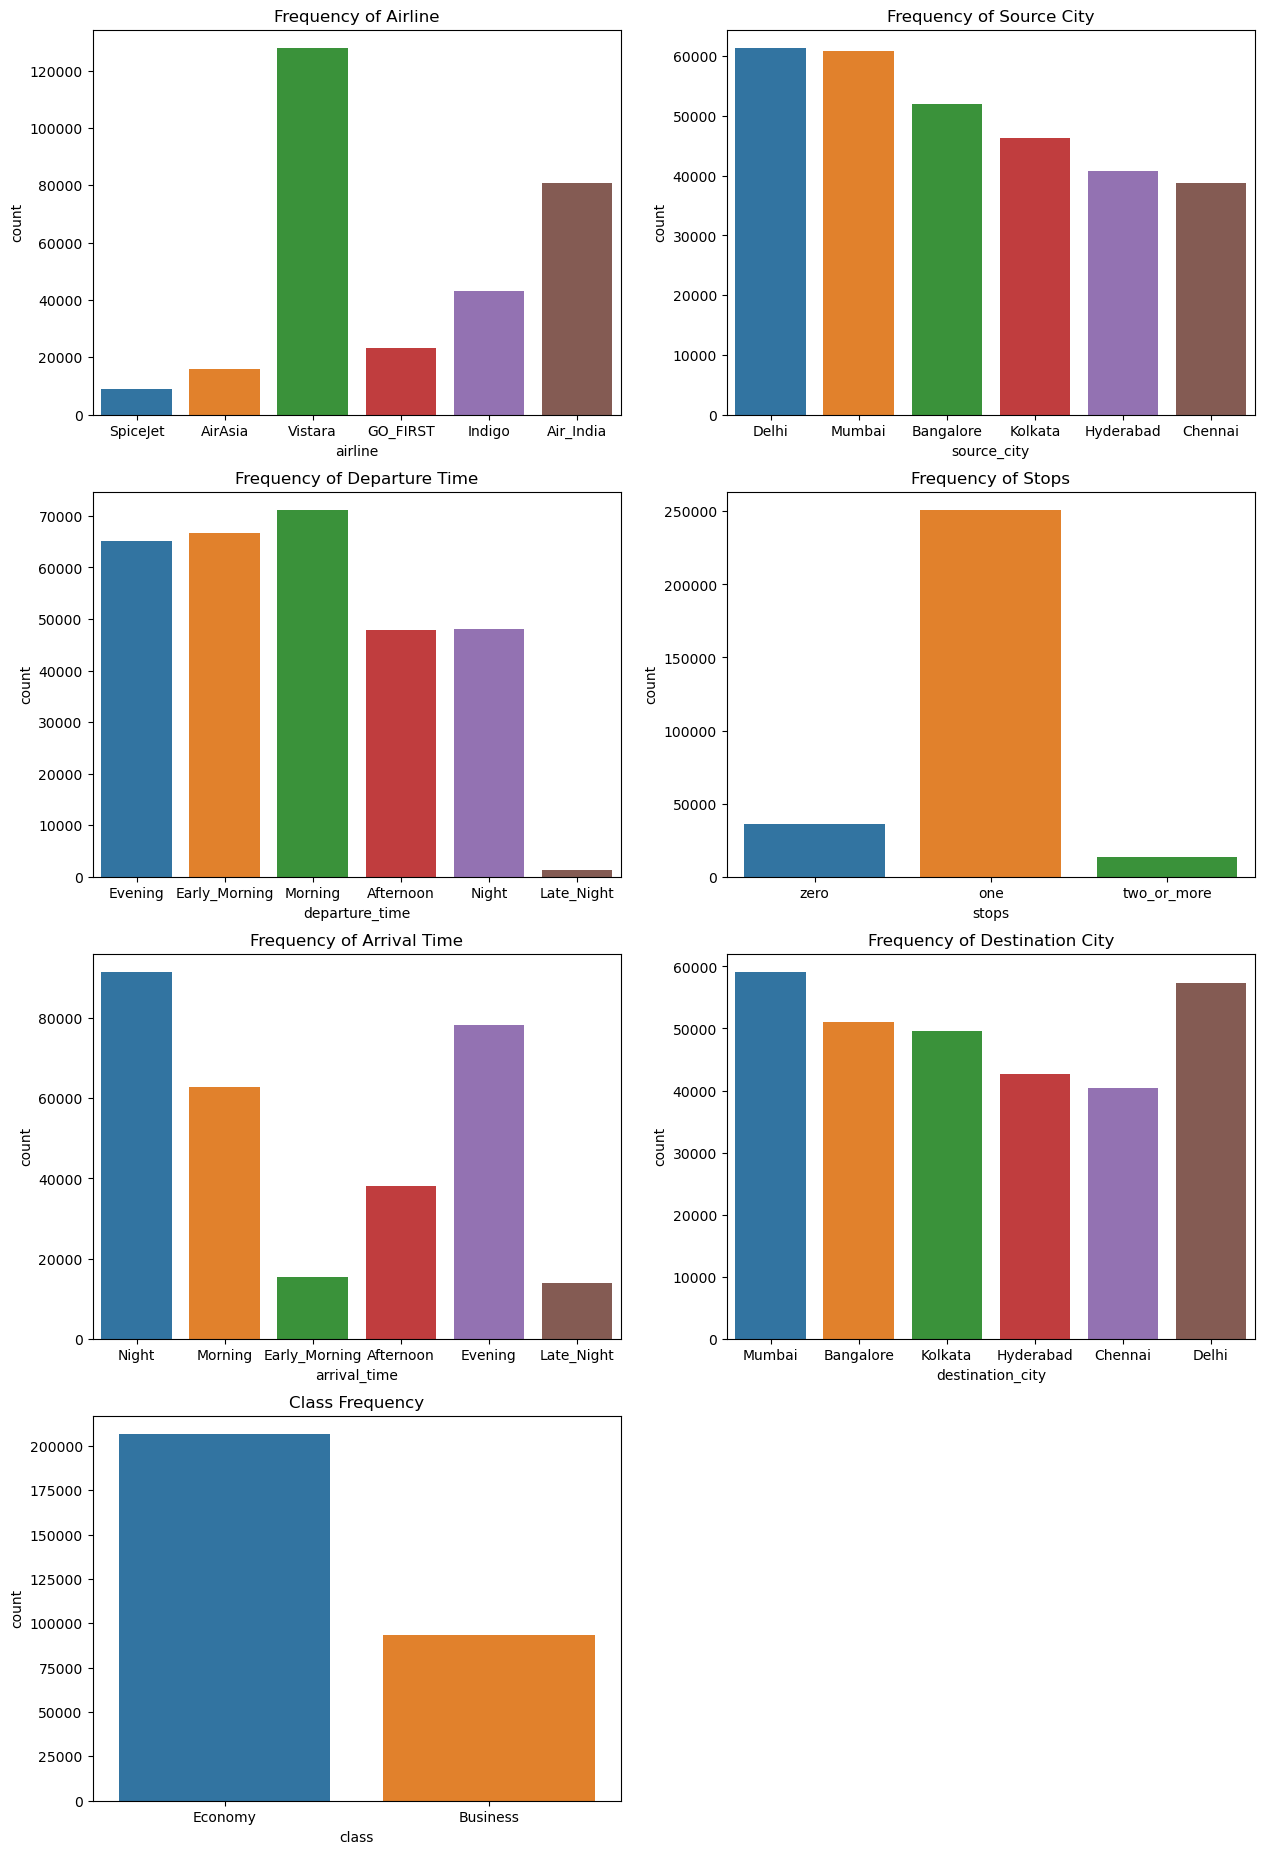

In [10]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
[plt.title('Frequency of Airline')]

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
[plt.title('Frequency of Source City')]

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df)
[plt.title('Frequency of Departure Time')]

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
[plt.title('Frequency of Stops')]

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
[plt.title('Frequency of Arrival Time')]


plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
[plt.title('Frequency of Destination City')]


plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
[plt.title('Class Frequency')]

plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['source_city']= le.fit_transform(df['source_city'])
df['departure_time']= le.fit_transform(df['departure_time'])
df['stops']= le.fit_transform(df['stops'])
df['arrival_time']= le.fit_transform(df['arrival_time'])
df['destination_city']= le.fit_transform(df['destination_city'])
df['class']= le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  a                 300153 non-null  int64  
dtypes: float64(1), int32(5), int64(5), object(1)
memory usage: 21.8+ MB


C:\Users\sashr\AppData\Local\Temp\ipykernel_22932\2819384282.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


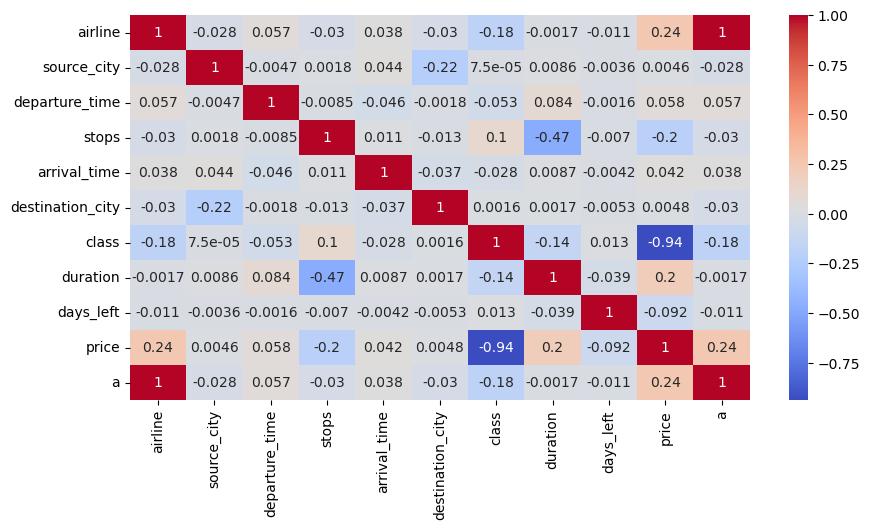

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [42]:
if 'stops' in df.columns:
    df = df.drop(columns=['stops'])
if 'flight' in df.columns:
    df = df.drop(columns=['flight'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i)
                          for i in range(len(X.columns))]
print(vif_data)

C:\Users\sashr\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


            feature       VIF
0           airline       inf
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132
8                 a       inf


In [43]:
x = df.drop(columns=['price'])
y = df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)
difference= pd.DataFrame(np.c_[y_test,y_pred], columns=['Actual_value','Predicted_value'])
difference

,Actual_value,Predicted_value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [30]:
print(x_train.columns[x_train.isin(['AI-424']).any()])


Index(['flight'], dtype='object')


In [49]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
print("r2_score:", r2_score)
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print("mean_abs_error:",mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test,y_pred)
print("mean_absolute_percentage_error:", mean_absolute_percentage_error)
mean_sq_error= metrics.mean_squared_error(y_test,y_pred)
print("mean_sq_error:",mean_sq_error )
root_mean_sq_error= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("root_mean_sq_error:",root_mean_sq_error )

r2_score: 0.897752737512321
mean_abs_error: 4468.426673542105
mean_absolute_percentage_error: 0.3476580461068165
mean_sq_error: 52706651.33334208
root_mean_sq_error: 7259.934664536733


C:\Users\sashr\AppData\Local\Temp\ipykernel_22932\1619767504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = "Actual")
C:\Users\sashr\AppData\Local\Temp\ipykernel_22932\1619767504.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label= "Predicted")


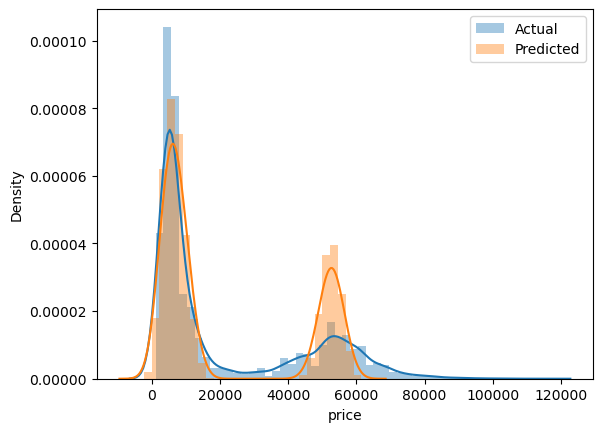

In [50]:
sns.distplot(y_test,label = "Actual")
sns.distplot(y_pred,label= "Predicted")
plt.legend()

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [52]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
print("r2_score:", r2_score)
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print("mean_abs_error:",mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test,y_pred)
print("mean_absolute_percentage_error:", mean_absolute_percentage_error)
mean_sq_error= metrics.mean_squared_error(y_test,y_pred)
print("mean_sq_error:",mean_sq_error )
root_mean_sq_error= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("root_mean_sq_error:",root_mean_sq_error )

r2_score: 0.9745321459010897
mean_abs_error: 1220.6053761112314
mean_absolute_percentage_error: 0.07760384557566959
mean_sq_error: 13128227.333826596
root_mean_sq_error: 3623.289573554203


C:\Users\sashr\AppData\Local\Temp\ipykernel_22932\1619767504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = "Actual")
C:\Users\sashr\AppData\Local\Temp\ipykernel_22932\1619767504.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label= "Predicted")


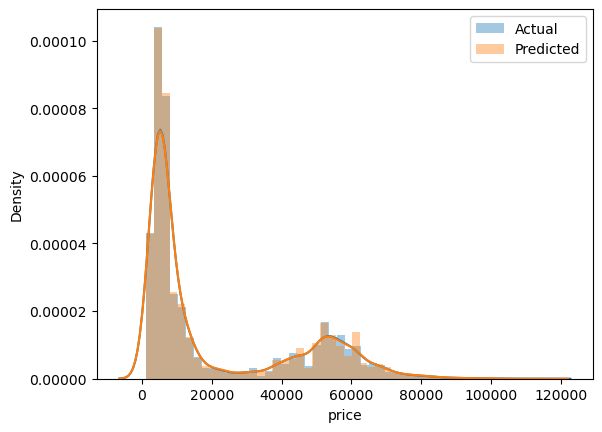

In [53]:
sns.distplot(y_test,label = "Actual")
sns.distplot(y_pred,label= "Predicted")
plt.legend()

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [55]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
print("r2_score:", r2_score)
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print("mean_abs_error:",mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test,y_pred)
print("mean_absolute_percentage_error:", mean_absolute_percentage_error)
mean_sq_error= metrics.mean_squared_error(y_test,y_pred)
print("mean_sq_error:",mean_sq_error )
root_mean_sq_error= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("root_mean_sq_error:",root_mean_sq_error )

r2_score: 0.9845275039979731
mean_abs_error: 1124.3934878994398
mean_absolute_percentage_error: 0.0734777484881141
mean_sq_error: 7975797.416910138
root_mean_sq_error: 2824.1454312606033


C:\Users\sashr\AppData\Local\Temp\ipykernel_22932\1619767504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = "Actual")
C:\Users\sashr\AppData\Local\Temp\ipykernel_22932\1619767504.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label= "Predicted")


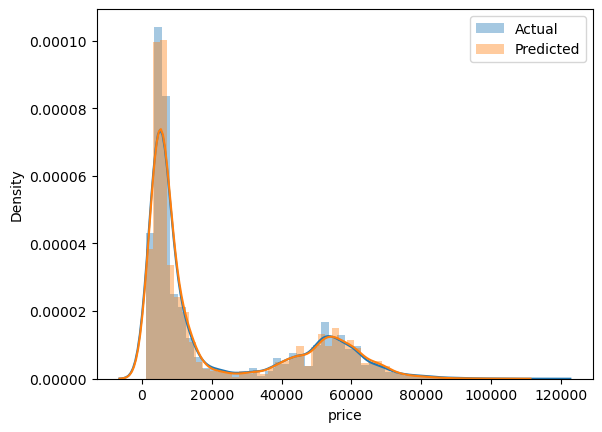

In [56]:
sns.distplot(y_test,label = "Actual")
sns.distplot(y_pred,label= "Predicted")
plt.legend()